# 내장 자료구조, 함수, 파일

### enumerate

In [3]:
li = ['foo','bar','baz']
mapping = {}

for i, v in enumerate(li):
    mapping[v] = i
    
mapping

{'foo': 0, 'bar': 1, 'baz': 2}

In [8]:
#다음을 인텍스로 하는 딕셔너리로 만들기

li = ['apple', 'banana', 'cherry', 'date']

{i:j for i,j in enumerate(li)}

{0: 'apple', 1: 'banana', 2: 'cherry', 3: 'date'}

### sorted
- 정렬

In [5]:
sorted([6,5,6,2,4,3,5,2,4])

[2, 2, 3, 4, 4, 5, 5, 6, 6]

### zip 
- 다른 순차 자료형과 짝지어줌

In [11]:
a = ['foo', 'bar', 'baz']
b = ['one', 'two', 'three']

zipping = zip(a,b)
list(zipping)

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]

- zip과 enumerate가 함께 사용 가능

In [13]:
for i, (c,d) in enumerate(zip(a, b)):
    print('{0}: {1},{2}'.format(i,c,d))

0: foo,one
1: bar,two
2: baz,three


### reversed
- 역순

In [19]:
a = [1,2,3,4,5]

list(reversed(a))

[5, 4, 3, 2, 1]

## 사전

In [20]:
empty_dict = {}
d1 = {'a' : 'some value', 'b':[1,2,3,4]}
d1

{'a': 'some value', 'b': [1, 2, 3, 4]}

### keys

In [23]:
list(d1.keys())

['a', 'b']

### values

In [24]:
list(d1.values())

['some value', [1, 2, 3, 4]]

### update
- 다른 사전과 합치기

In [25]:
d1.update({'b':'foo', 'c':'12'})
d1

{'a': 'some value', 'b': 'foo', 'c': '12'}

## 집합

### set
- 집합 생성

In [26]:
set([1,2,3,4,4,5])

{1, 2, 3, 4, 5}

- 합집합 -> |

In [28]:
a = {1,2,3,4}
b = {3,4,5,6}

a|b

{1, 2, 3, 4, 5, 6}

- 교집합 -> intersection

In [29]:
a.intersection(b)

{3, 4}

## 리스트, 집합, 사전 표기법

In [ ]:
result = []
for val in collection:
    if condition:
        result.append(expr)

In [ ]:
expr for val in collection if condition  # 위 아래 같은 문장(리스트 표기법)

In [3]:
#중첩된 리스트 표기법

all_data = [['John','Emily','Michael','Mary','Steven'],
            ['Maria','Juan','Javier','Natalia','Pilar']]

In [21]:
a = [name for i in all_data for name in i
     if name.count('e') >= 2]

list(a)

['Steven']

In [22]:
a = [(1,2,3),(4,5,6),(7,8,9)]
c = [b for i in a for b in i]
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## 익명함수

### lambda
- '익명 함수를 선언한다'
- (lambda 매개변수 : 표현식)(x,y의 각각 넣어줄 숫자)

In [29]:
def hap(x, y):
    return x + y

hap(10, 20)   # 이 식을 간단하게 하면 밑에처럼 쓸 수 있다.

30

In [30]:
(lambda x,y : x+y)(10,20)

30

In [ ]:
m = lambda x :x[0]  #이렇게도 쓰임

## 제너레이터

### Iterable
- 반복 가능한 객체
- 대표적인 iterable한 타입 : list, dict, set, str, bytes, tuple, range

### Iterator
- 값을 차례대로 꺼낼 수 있는 객체
- 파이썬 내장함수인 iter()를 사용해서 iterator 객체를 만들 수 있다.

### Generator
- 순회 가능한 객체를 생성하는 간단한 방법, 함수안에 yield 키워드를 사용
- yield 가 호출되면 암시적으로 return이 호출되며,

  한번 더 실행되면 실행되었던 yield 다음 코드가 실행된다.
- 특징
   1. iterable한 순서가 지정됨(모든 generator는 iterator)
   2. 무한한 순서가 있는 객체를 모델링할 수 있다.(for문에서 사용 가능)

In [40]:
a = {'A':1, 'B':2, 'C':3}

for key in a:
    print(key)

A
B
C


In [39]:
def number_generator():
    yield 0
    yield 1
    yield 2
    yield 3

for i in number_generator():
    print(i)

0
1
2
3


- 제너레이터 표현식

In [41]:
gen = (x**2 for x in range(100))

In [43]:
def make_gen():
    for x in range(100):
        yield x**2

gen와 make_gen은 동일한 코드이다.

### itertools 모듈
- 매개변수로 입력된 iterable 안에 있는 키를 확인 후,
  
  분류하여 동일한 키를 가진 element들을 해당 키를 기준으로
  그룹지어 리턴한다.

In [46]:
from itertools import groupby

a = [('Europe', 'Manchester'),
    ('Asia', 'Seoul'),
    ('Asia', 'Tokyo'),
    ('America', 'NewYork')]

In [48]:
m = lambda x :x[0]
g = groupby(a, m)

for key, group in g:
    print(key + ':', list(group))

Europe: [('Europe', 'Manchester')]
Asia: [('Asia', 'Seoul'), ('Asia', 'Tokyo')]
America: [('America', 'NewYork')]


In [83]:
name = ['Alan', 'Adam', 'Wes', 'Will', 'Steven']

first_name = lambda x : x[0]
g = groupby(name, first_name)

for first, group in g:
    print(first, ':', list(group))

A : ['Alan', 'Adam']
W : ['Wes', 'Will']
S : ['Steven']


# Numpy

### array
- 배열을 생성한다.

In [86]:
import numpy as np

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [87]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

```
arr1은 1차원 형태로 생성되었고
arr2는 해당 데이터로부터 형태를 추론해서 2차원 형태로 생성되었다.
```

In [2]:
import numpy as np
a= np.arange(1,13).reshape(2,2,3)
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

- np.zeros()

In [88]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

- np.ones()

In [90]:
np.ones((2,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

- np.arange()

In [92]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### astype('데이터타입')
- 데이터 타입을 명시해준다.

In [100]:
a = np.array(['1.25', '-9.6', '42'])

a = a.astype('float')
a

array([ 1.25, -9.6 , 42.  ])

### 슬라이싱 기초

In [101]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
arr[5:8]

array([5, 6, 7])

In [103]:
arr[5:8] = 12

In [104]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

리스트와의 중요한 차이점은 배열 조각은 원본 배열의 '뷰'라는 점이다.

즉, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다.

### 배열 전치와 축 바꾸기
- transpose 메서드, T

In [10]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [11]:
np.transpose(arr)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [4]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### 유니버설 함수
- np.sqrt(a)->루트, np.exp(a)
- np.add(a,b), np.maximum(a,b)
- divmod( , ), np.modf(데이터) -> 몫과 나머지를 한번에 보여준다. 

In [13]:
import numpy as np

a = np.arange(1,17).reshape(4,4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [14]:
np.sqrt(a**2)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [16]:
a = np.arange(1,17).reshape(4,4)
b = np.arange(16,0,-1).reshape(4,4)
print(a)
print()
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[16 15 14 13]
 [12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


In [17]:
np.maximum(a,b)

array([[16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [18]:
divmod(16, 5)

(3, 1)

In [19]:
a = np.random.randn(3,3)
np.modf(a)

(array([[ 0.30398671,  0.635314  ,  0.90723258],
        [ 0.04672458,  0.5569218 ,  0.66153258],
        [-0.46103427,  0.58404013, -0.53375922]]),
 array([[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [-0.,  0., -0.]]))

### meshgrid()
- x값의 배열과 y값의 배열로 직사각형 격자를 만드는 것이 목적

In [20]:
points = np.arange(1,4)
points

array([1, 2, 3])

In [21]:
np.meshgrid(points, points)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

행으로 [1,2,3] 으로 나열 되고 다음에는 열로 [1,2,3]으로 나열되어 있다.

In [23]:
xs, ys = np.meshgrid(points, points)

z = np.sqrt(xs**2 + ys**2)
z

array([[1.41421356, 2.23606798, 3.16227766],
       [2.23606798, 2.82842712, 3.60555128],
       [3.16227766, 3.60555128, 4.24264069]])

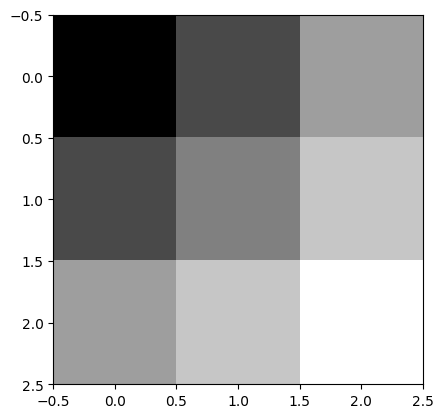

In [24]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap =plt.cm.gray)

In [25]:
points = np.arange(-5,5, 0.01)
print(points)

print()
np.meshgrid(points, points)

[-5.0000000e+00 -4.9900000e+00 -4.9800000e+00 -4.9700000e+00
 -4.9600000e+00 -4.9500000e+00 -4.9400000e+00 -4.9300000e+00
 -4.9200000e+00 -4.9100000e+00 -4.9000000e+00 -4.8900000e+00
 -4.8800000e+00 -4.8700000e+00 -4.8600000e+00 -4.8500000e+00
 -4.8400000e+00 -4.8300000e+00 -4.8200000e+00 -4.8100000e+00
 -4.8000000e+00 -4.7900000e+00 -4.7800000e+00 -4.7700000e+00
 -4.7600000e+00 -4.7500000e+00 -4.7400000e+00 -4.7300000e+00
 -4.7200000e+00 -4.7100000e+00 -4.7000000e+00 -4.6900000e+00
 -4.6800000e+00 -4.6700000e+00 -4.6600000e+00 -4.6500000e+00
 -4.6400000e+00 -4.6300000e+00 -4.6200000e+00 -4.6100000e+00
 -4.6000000e+00 -4.5900000e+00 -4.5800000e+00 -4.5700000e+00
 -4.5600000e+00 -4.5500000e+00 -4.5400000e+00 -4.5300000e+00
 -4.5200000e+00 -4.5100000e+00 -4.5000000e+00 -4.4900000e+00
 -4.4800000e+00 -4.4700000e+00 -4.4600000e+00 -4.4500000e+00
 -4.4400000e+00 -4.4300000e+00 -4.4200000e+00 -4.4100000e+00
 -4.4000000e+00 -4.3900000e+00 -4.3800000e+00 -4.3700000e+00
 -4.3600000e+00 -4.35000

[array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])]

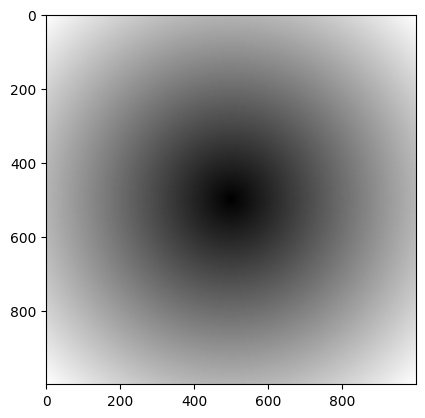

In [26]:
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)
z

import matplotlib.pyplot as plt
plt.imshow(z, cmap =plt.cm.gray)

### 수학 메서드 & 통계 메서드
- arr.mean()  , np.mean()
- arr.sum()
- arr.cumsum(행? 열?) -> 누적합
- arr.cumprod(행? 열?) -> 누적곱

In [27]:
arr = np.random.randn(5,4)
arr

array([[ 0.51553246, -1.45102773, -1.08414835,  0.19186633],
       [-0.27911283,  0.09010319, -1.95918296, -0.60664354],
       [-1.85825892,  0.64307693, -0.77369189, -0.88299936],
       [ 0.40148987, -0.33762664,  0.54507442, -0.69642304],
       [-0.35425791, -1.90804557,  1.3896752 , -0.55956771]])

In [28]:
arr.mean()

-0.44870840384666044

In [29]:
np.mean(arr)

-0.44870840384666044

In [30]:
arr.sum()

-8.974168076933209

In [31]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [33]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### sort
- 1차원 부분을 정렬

In [37]:
myList = [4, 2, 3, 5, 1]
myList.sort()
myList

[1, 2, 3, 4, 5]

In [34]:
arr = np.random.randn(5,3)
arr

array([[ 0.31745891, -0.68218697,  0.70901448],
       [ 0.41076896, -0.54433856, -0.21102576],
       [ 0.43627278, -0.34591095, -1.49515884],
       [-1.90004005, -1.38823834, -0.40893669],
       [-0.19010477, -1.09398631, -0.64302145]])

In [38]:
arr.sort(axis = 1)
arr

array([[-0.68218697,  0.31745891,  0.70901448],
       [-0.54433856, -0.21102576,  0.41076896],
       [-1.49515884, -0.34591095,  0.43627278],
       [-1.90004005, -1.38823834, -0.40893669],
       [-1.09398631, -0.64302145, -0.19010477]])

#### sort( ) 와 sorted( ) 의 차이

```
sort() -> 리스트를 정렬된 상태로 변경한다.
sorted() -> 이터러블 객체로부터 정렬된 리스트를 생성한다.
            (내장함수이다.)
```

### np.unique()
- 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환하는 함수

In [105]:
name = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [106]:
np.unique(name)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

### np.in1d
- 정해준 원소가 포함하는지 나타내는 불리언 배열

In [5]:
import numpy as np

In [6]:
a = np.array([6,0,0,3,2,5,6])

np.in1d(a, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

### np.random
- randint -> 주어진 최소/최대 범위 안에서 임의의 난수를 추출
- randn -> 표준편차가 1이고 평균값이 0인 정규분포에서 표본을 추출
- normal -> 정규분포에서 표본을 추출
- uniform -> 0과 1사이에서 추출하는 균등분포/ 설정값에 따라 좀 더 섬세하게 추출가능

- np.random.seed(시작점의 값)  ->  random을 할때 출발하는 시작점에 값을 준다.

                                   주의할 점은 준 값이 설정되서 그 범위에서만 계속 랜덤하게 추출된다.
                                   
- np.random.RandomState(시작점의 값)  -> 실행 할때만 주어지고 실행 후에는 사라진다.

                                         이렇게 쓰길 권장한다.

In [1]:
import numpy as np
np.random.randint(3,10, size = (2,3))

array([[5, 6, 8],
       [8, 5, 6]])

In [2]:
np.random.randn(2,3)

array([[-0.21231612,  0.52955537,  1.54793731],
       [ 0.20244027,  1.06915414, -0.8766074 ]])

In [108]:
a = np.random.normal(size = (4,4))
a

array([[-0.95251574, -2.33397988, -1.86659069, -0.99808454],
       [ 0.81976274, -1.91849312, -0.6951497 , -1.05566583],
       [ 1.07599734, -0.1356794 , -0.72891413, -0.96165884],
       [-0.49812924,  0.08643829, -0.42618419, -1.31830111]])

normal을 이용하여 표준정규분포로부터 4X4크기의 표본 생성함

In [3]:
np.random.uniform(size = (2,3))

array([[0.93903968, 0.71859793, 0.42493715],
       [0.46547304, 0.17939599, 0.49430229]])

<한 개만 추출하기>
```
random.uniform(0,1)
random.random()  -> 기본적인 형태(보통은 이렇게 쓴다.)
```

# Pandas

### Series
- 객체를 담을 수 있는 1차원 자료구조

- s.values -> 값 출력
- s.index -> 인덱스 범위 출력
- pd.isnull(s), pd.notnull(s) -> 누락된 데이터(NA)을 찾을 때 사용

In [6]:
import pandas as pd

In [7]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [9]:
obj.values  #값만 보여준다.

array([ 4,  7, -5,  3], dtype=int64)

In [10]:
obj.index  #인덱스 범위

RangeIndex(start=0, stop=4, step=1)

In [12]:
s = pd.Series([4,7,-5,3], index = ['a', 'b', 'c', 'd']) #인덱슨느 숫자만 가능한 것이 아니라 문자열도 가능하다.
s

a    4
b    7
c   -5
d    3
dtype: int64

In [13]:
s[['a', 'b']]  #인덱싱 : 인덱스로 골라내기

a    4
b    7
dtype: int64

In [14]:
s > 0

a     True
b     True
c    False
d     True
dtype: bool

In [15]:
s[s>0]

a    4
b    7
d    3
dtype: int64

In [17]:
#파이썬 사전 객체로부터 Series 객체 생성 가능
states = ['California', 'Ohio', 'Oregon', 'Texas'] 
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Key는 인덱스로 values는 값으로 잡힌다.

In [18]:
states = ['California', 'Ohio', 'Oregon', 'Texas'] 
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj4 = pd.Series(sdata, index = states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [19]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [20]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [21]:
#인덱스 바꾸기
obj4.index = ['a','b','c','d']
obj4

a        NaN
b    35000.0
c    16000.0
d    71000.0
dtype: float64

```
<주의>

obj4.index[0] = 'A' 을 실행시키면
TypeError: Index does not support mutable operations 이라는 오류 발생

에러 해결 : 인덱스 바꿔줄때는 하나만 못 바꾸고 한꺼번에 바꿔줘야 한다.
```

### DataFrame

- df.loc[ , ], df.iloc[ , ]  -> 접근방법

  ```
  array[]는 바로 접근할 수 있지만 데이터 프레임에서는 불가능하다.
  그래서 중간에 꼭 df.loc[,]나 df.iloc[,]으로 접근해야 한다.
  ```
  
 - del frame['eastern']  -> 삭제
 - frame.T   -> 칼럼과 로우 뒤집기
 - frame.values   -> 값 출력

In [22]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [29]:
#원하는 이름과 순서로 colums 지정하기
print(pd.DataFrame(data, columns = ['year','state','pop','debt']))  #'debt'이라는 없는 칼럼이 생성됨
print()
print(pd.DataFrame(data, columns = ['state','year','pop','debt']))

   year   state  pop debt
0  2000    Ohio  1.5  NaN
1  2001    Ohio  1.7  NaN
2  2002    Ohio  3.6  NaN
3  2001  Nevada  2.4  NaN
4  2002  Nevada  2.9  NaN
5  2003  Nevada  3.2  NaN

    state  year  pop debt
0    Ohio  2000  1.5  NaN
1    Ohio  2001  1.7  NaN
2    Ohio  2002  3.6  NaN
3  Nevada  2001  2.4  NaN
4  Nevada  2002  2.9  NaN
5  Nevada  2003  3.2  NaN


In [31]:
df = frame.copy()

df.loc[:,'state']      #빈칸으로 두면 안되고 뭐라도 써야한다.

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [32]:
df.loc[:,['state','year']]

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,Nevada,2003


In [33]:
df.iloc[:, [0]]

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada
5,Nevada


In [34]:
df[:2]    #인덱싱으로 잡아주는게 아니라 꼭 슬라이싱으로 잡아줘야한다.

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7


In [35]:
frame['eastern'] = frame.state == 'Ohio'
frame

,state,year,pop,eastern
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


In [36]:
del frame['eastern']   #삭제
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [37]:
frame.T  #칼럼과 로우 뒤집기

,0,1,2,3,4,5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2


In [40]:
frame.values   #DataFrame을 array(2차원 배열)로 바꿔주고 싶으면 뒤에 .values라고 붙이기

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

### index
- 파이썬의 집합과는 달리 pandas의 인덱스는 중복되는 값을 허용한다.

In [41]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [42]:
df.index = ['a','b','c','a','b','c']
df

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
a,Nevada,2001,2.4
b,Nevada,2002,2.9
c,Nevada,2003,3.2


### reindex
- 인덱스 다시 바꾸기

- method = 'ffill' -> 결측치를 직전의 값으로 채워 넣어주는 방법

In [43]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']) 
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [46]:
obj.reindex(['a','b','c','d','e'])
#덮어쓰는게 아니라 정렬을 해주는 모습이다.
#그래서 e는 값이 없는 것으로 나왔다.

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [49]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [50]:
obj = obj.reindex(['a','b','c','d'])
obj

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [51]:
obj['b' : 'c']    #슬라이싱도 가능하다.

b    7.2
c    3.6
dtype: float64

In [52]:
obj > 0

a    False
b     True
c     True
d     True
dtype: bool

In [53]:
obj[obj > 0]

b    7.2
c    3.6
d    4.5
dtype: float64

### drop
- df.drop(['a'], axis=0)  -> 'a'을 제외시킨다.(axis=0은 열, 1은 행이다.)
- drop 함수는 크기 또는 형태를 변경하지만 원본 객체를 변경하니 주의할것

In [47]:
df.drop(['a'], axis=0)

,state,year,pop
b,Ohio,2001,1.7
c,Ohio,2002,3.6
b,Nevada,2002,2.9
c,Nevada,2003,3.2


In [48]:
df.drop(['state'], axis=1)

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
a,2001,2.4
b,2002,2.9
c,2003,3.2


### 유니버설 함수 적용
- np.abs(frame) : 음수를 전부 양수로 바꿔준다.
- frame.apply(sum) : 총 합
- frame.apply(np.mean) : 평균
- frame.mix(),frame.max()
- frame.apply(lambda x : 람다식, axis = )

In [56]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon']) 
frame

,b,d,e
Utah,-0.477258,-1.465341,-1.828722
Ohio,0.037826,-0.959602,1.212432
Texas,-0.417939,0.655925,0.938720
Oregon,0.098010,-0.375021,-1.564697


In [57]:
#음수를 전부 양수로 만들어주세요.
frame = np.abs(frame)
frame

,b,d,e
Utah,0.477258,1.465341,1.828722
Ohio,0.037826,0.959602,1.212432
Texas,0.417939,0.655925,0.938720
Oregon,0.098010,0.375021,1.564697


In [58]:
frame.apply(sum)

b    1.031034
d    3.455888
e    5.544571
dtype: float64

In [59]:
frame.apply(sum, axis = 1)

Utah      3.771321
Ohio      2.209860
Texas     2.012583
Oregon    2.037729
dtype: float64

In [60]:
frame.apply(np.mean)

b    0.257759
d    0.863972
e    1.386143
dtype: float64

In [61]:
frame.min()

b    0.037826
d    0.375021
e    0.938720
dtype: float64

In [62]:
frame.max()

b    0.477258
d    1.465341
e    1.828722
dtype: float64

In [63]:
#최댓값과 최솟값의 차이
def f(x):
    return x.max() - x.min()

frame.apply(f)

b    0.439432
d    1.090320
e    0.890002
dtype: float64

In [65]:
frame.apply(lambda x : x.max()-x.min(), axis = 1)   #위의 식과 같다

Utah      1.351464
Ohio      1.174606
Texas     0.520781
Oregon    1.466687
dtype: float64

In [68]:
form = lambda x : '%.2f' %x     #.2f : 소수점 이하 둘째자리까지, %는 변수라는 표시

frame.applymap(form)

,b,d,e
Utah,0.48,1.47,1.83
Ohio,0.04,0.96,1.21
Texas,0.42,0.66,0.94
Oregon,0.10,0.38,1.56


```
<주의>

frame.applymap(form)이라고 안하고 frame.apply(form)을 실행시키면
TypeError: cannot convert the series to <class 'float'>
이라는 오류가 발생한다.

apply가 에러나는 이유는 열로 통으로 잡아줘서이다.
applymap은 하나하나 터지해서 잡아주기 때문에 에러가X
```

### sort_index
- 로우나 칼럼을 알파벳순으로 정렬 후 정렬된 새로운 객체를 반환한다.

### sort_values
- 값에 따라 정렬

- obj.sort_index()
- obj.sort_values()
- obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
- obj.rank()

In [70]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']) 
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [71]:
obj.sort_index()

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [72]:
obj.sort_values()

a   -5.3
c    3.6
d    4.5
b    7.2
dtype: float64

In [73]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [74]:
obj.rank()      #tanking, 순위, 등수
                #동점인 항목에 대해서는 평균 순위를 매긴다.

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

### is_unique
- 해당 값이 유일한지 아닌지 알려주며 인덱스가 중복된 것이 있어도 가능하다.
- 중복되는 색인값이 있다면 Series객체를, 중복되는게 없다면 스칼라값을 반환한다.
- 스칼라값은 한 개의 숫자를 이야기 한다.

In [75]:
obj = pd.Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [77]:
# 중복되는 색인값이 있는 경우
obj['a']

a    0
a    1
dtype: int64

In [79]:
# 중복되는 색인값이 없는 경우
obj['c']

4

### isin
- 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰인다.

In [93]:
import pandas as pd

In [97]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
df.isin([1, 3, 12, 'a'])  #이 값을 골라냈다.

,A,B
0,True,True
1,False,False
2,True,False


In [91]:
# a in b
if "a" in ['a','b','c']:
    print('Yes')     #isin과 같은 맥락

Yes


In [86]:
df.isin(['Ohio'])  #Ohio가 있나요? True

,state,year,pop
a,True,False,False
b,True,False,False
c,True,False,False
a,False,False,False
b,False,False,False
c,False,False,False


In [87]:
df['state'].isin(['Ohio'])

a     True
b     True
c     True
a    False
b    False
c    False
Name: state, dtype: bool

### 상관관계와 공분산
- price.corr() : 상관관계를 보여준다.
- price.cov() : 공분산을 보여준다.
- price.pct_change() : 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력한다.

                       즉, (다음행 - 현재행)÷현재행 을 의미

In [80]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-27,36.593594,109.783890,69.393127,47.224499
2017-09-28,36.368187,109.783890,69.411926,47.474998
2017-09-29,36.567486,109.346756,69.994499,47.955502
2017-10-02,36.493935,110.537598,70.107277,47.663502
2017-10-03,36.652916,110.628021,69.778397,47.889500
...,...,...,...,...
2022-09-20,156.899994,126.300003,242.449997,101.830002
2022-09-21,153.720001,124.930000,238.949997,100.010002
2022-09-22,152.740005,125.309998,240.979996,100.570000


In [83]:
price[['AAPL','IBM']].corr()    #서로의 상관관계를 보여준다.(1에 가까울수록 높은 상관관계)

,AAPL,IBM
AAPL,1.000000,0.529727
IBM,0.529727,1.000000


In [84]:
price.pct_change()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-27,NaN,NaN,NaN,NaN
2017-09-28,-0.006160,0.000000,0.000271,0.005304
2017-09-29,0.005480,-0.003982,0.008393,0.010121
2017-10-02,-0.002011,0.010891,0.001611,-0.006089
2017-10-03,0.004356,0.000818,-0.004691,0.004742
...,...,...,...,...
2022-09-20,0.015665,-0.011195,-0.008466,-0.019451
2022-09-21,-0.020268,-0.010847,-0.014436,-0.017873
2022-09-22,-0.006375,0.003042,0.008495,0.005599


### value_counts
- Series에서 유일값에 대한 색인과 도수를 계산, 도수는 내림차순으로 정렬된다.
- data['Qu1'].value_counts()

In [88]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                      'Qu3': [1, 5, 2, 4, 4]}) 

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [89]:
data['Qu1'].value_counts()

3    2
4    2
1    1
Name: Qu1, dtype: int64

In [90]:
df = data.apply(pd.value_counts)
df

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


# 데이터 로딩과 저장, 파일 형식

In [98]:
pd.read_csv('csv_exam.csv')

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


### JSON 데이터
- 데이터 보낼 때 널리 사용하는 표준 파일 형식 중 하나이다.

In [99]:
import requests

In [100]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues' 

In [101]:
resp = requests.get(url)
resp

<Response [200]>

In [102]:
data = resp.json()
data

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806',
  'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
  'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/labels{/name}',
  'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/comments',
  'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/events',
  'html_url': 'https://github.com/pandas-dev/pandas/issues/48806',
  'id': 1387444078,
  'node_id': 'I_kwDOAA0YD85Ssrdu',
  'number': 48806,
  'title': 'BUG: Bar plot with integer index does not place bars at index positions which makes xlim fail',
  'user': {'login': 'cfblaeb',
   'id': 6593035,
   'node_id': 'MDQ6VXNlcjY1OTMwMzU=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/6593035?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/cfblaeb',
   'html_url': 'https://github.com/cfblaeb',
   'followers_url': 'https://api.github.com/users/cfblaeb/follow

In [103]:
data[0]['url']  #접근

'https://api.github.com/repos/pandas-dev/pandas/issues/48806'

In [104]:
issues = pd.DataFrame(data)     #데이터 프레임으로 바꾸기
issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48806,1387444078,I_kwDOAA0YD85Ssrdu,48806,BUG: Bar plot with integer index does not plac...,...,None,NONE,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48805,1387090446,PR_kwDOAA0YD84_qPpH,48805,Added padding and fixed columns for sponsor lo...,...,None,NONE,None,Added padding and fixed columns for sponsor lo...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48804,1387017557,PR_kwDOAA0YD84_qAIu,48804,TST: Suppress Series constructor warning,...,None,MEMBER,None,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48803,1386980560,I_kwDOAA0YD85Sq6TQ,48803,DOC: Remove unsupported parameters in `Resampl...,...,None,NONE,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48802,1386976936,I_kwDOAA0YD85Sq5ao,48802,ENH: support negative axis,...,None,CONTRIBUTOR,None,### Feature Type\n\n- [X] Adding new functiona...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
5,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48800,1386839371,PR_kwDOAA0YD84_pawM,48800,Backport PR #48608 on branch 1.5.x (REGR: asse...,...,None,NONE,None,Backport PR #48608: REGR: assert_index_equal r...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
6,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pa

# 데이터 정제 및 준비

### dropna
- 누락된 데이터가 있는 축(로우,컬럼)을 제외시킨다.(하나라도 있으면 제외)
- notnull()과 같은 방식

In [105]:
from numpy import nan as NA   #np.nan을 NA로 할당했다.

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [106]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [107]:
data = pd.DataFrame([[1,6.5,3],[1,NA,NA],
                    [NA,NA,NA],[NA,6.5,3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [108]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


```
DataFrame 객체의 경우에는 모두 NA값인 로우나 컬럼만을 제외시킨다.
dropna는 기본적으로 NA값이 하나라도 포함하고 있는 로우를 제외시킨다.
```

### fillna
- fillna(채워 넣고 싶은 값)
- 누락된 데이터를 대신할 값을 채우거나 'ffill'이나 'bfill' 같은 보간 메서드를 적용한다.
- fillna에 사전값을 넘겨서 각 칼럼마다 다른 값을 채울 수도 있다. -> df.fillna({1:0.5, 2:0})
- fillna는 새로운 객체를 반환하지만 기존 객체를 변경할 수도 있다.

In [111]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.861167,NaN,NaN
1,-1.424624,NaN,NaN
2,0.170282,NaN,-0.359745
3,0.980791,NaN,0.015648
4,-0.725212,-1.776044,-0.284780
5,1.243202,0.464715,-0.379286
6,-0.695390,-1.025323,0.948686


In [112]:
df.fillna(0)

,0,1,2
0,-0.861167,0.000000,0.000000
1,-1.424624,0.000000,0.000000
2,0.170282,0.000000,-0.359745
3,0.980791,0.000000,0.015648
4,-0.725212,-1.776044,-0.284780
5,1.243202,0.464715,-0.379286
6,-0.695390,-1.025323,0.948686


### 중복 제거
- data.duplicated() : 각 로우가 중복인지 아닌지 알려준다.
- data.drop_duplicates()  : duplicated 배열이 False인 DataFrame을 반환한다.

In [113]:
data = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                    'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [114]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [115]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


### map
- 파이썬의 내장 함수인 map()는 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용된다.
  따라서, 여러 개의 데이터를 담고 있는 list나 tuple을 대상으로 주로 사용하는 함수

In [118]:
#가상으로 수집한 육류 데이터 변형하기
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                             'Pastrami', 'corned beef', 'Bacon',
                             'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [119]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

map은 사전류의 객체나 어떤 함수를 받을 수 있는데 위 데이터에는 육류 이름에 대소문자가 섞여있으므로

str.lower 메서드를 사용해서 모두 소문자로 통일 시키기.

In [121]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [123]:
data['animal'] = lowercased.map(meat_to_animal)
data   

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon
